In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy as nd
from numpy import random
import pandas as pd
from pandas import Series
from IPython.display import Image, HTML, display
import os

In [2]:
# Read the csv file into a pandas DataFrame

wine_data = pd.read_csv('./Data/wine.csv')
wine_data.head()

,Unnamed: 0,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,high_quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0


In [3]:
# Assign the data to X and y

X = wine_data.drop("color", axis=1)

y = wine_data["high_quality"].values.reshape(-1, 1)

print(X.shape, y.shape)

(6497, 14) (6497, 1)


In [4]:
# Add graphviz executables
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [5]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)
print(X_train, y_train)

      Unnamed: 0  fixed_acidity  volatile_acidity  citric_acid  \
1539        1539            7.2             0.390         0.32   
1109        1109           10.8             0.470         0.43   
100          100            8.3             0.610         0.30   
5477        3878            6.5             0.350         0.31   
6416        4817            5.8             0.385         0.25   
...          ...            ...               ...          ...   
3772        2173            7.6             0.320         0.58   
5191        3592            5.6             0.280         0.27   
5226        3627            6.4             0.370         0.20   
5390        3791            6.5             0.260         0.50   
860          860            7.2             0.620         0.06   

      residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  \
1539            1.80      0.065                 34.0                  60.0   
1109            2.10      0.171                 27.

In [8]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train.ravel())
rf.score(X_test, y_test)
feature_names = X.columns

In [9]:
# Calculate feature importance
importances = rf.feature_importances_
importances

array([0.001657  , 0.00153167, 0.01437639, 0.00636456, 0.00168254,
       0.00653593, 0.00345759, 0.00294633, 0.01253297, 0.00110244,
       0.00304189, 0.03898568, 0.46600564, 0.43977935])

In [10]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.46600563914872717, 'quality'),
 (0.43977935337868534, 'high_quality'),
 (0.03898568134006717, 'alcohol'),
 (0.014376386692173613, 'volatile_acidity'),
 (0.012532967766152328, 'density'),
 (0.006535929964734917, 'chlorides'),
 (0.00636456147270542, 'citric_acid'),
 (0.0034575947341273085, 'free_sulfur_dioxide'),
 (0.0030418949838137924, 'sulphates'),
 (0.002946331548508545, 'total_sulfur_dioxide'),
 (0.0016825442955718016, 'residual_sugar'),
 (0.0016570004856619916, 'Unnamed: 0'),
 (0.001531674893979341, 'fixed_acidity'),
 (0.001102439295091279, 'pH')]

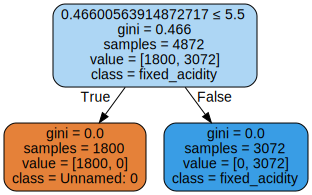

In [11]:
# Create a decision tree graph
import graphviz 
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names=importances,  
    class_names=feature_names,  
    filled=True, rounded=True,  
    special_characters=True)  

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
# graph.write_png('wine_quality.png')

graph = graphviz.Source(dot_data)  
graph

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler

# Create StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [22]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.998
k: 3, Train/Test Score: 0.999/0.998
k: 5, Train/Test Score: 0.999/0.999
k: 7, Train/Test Score: 0.999/0.999
k: 9, Train/Test Score: 0.999/0.999
k: 11, Train/Test Score: 0.999/0.999
k: 13, Train/Test Score: 0.998/0.999
k: 15, Train/Test Score: 0.999/0.999
k: 17, Train/Test Score: 0.999/0.998
k: 19, Train/Test Score: 0.999/0.999


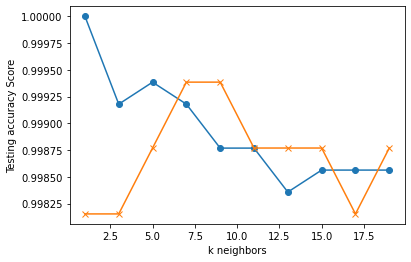

In [23]:
from sklearn.neighbors import KNeighborsClassifier

# Loop through different k values to see which has the highest accuracy
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train.ravel())
    train_score = knn.score(X_train_scaled, y_train.ravel())
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [24]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train.ravel())
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=13 Test Acc: 0.999
